In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sys
sys.version

'3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]'

In [2]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [3]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  ...  Inflight entertainment  On-board service  \
0                   1  ...                       5                 4   
1                   3  ...                       1                 1   
2                   2  ...                       5                 4   
3                   5  ...                       2                 2   
4                   3  ...                       3                 3   
...               ...  ...                     ...               ...   
103899              3  ...                       2                 3   
103900              4  ...                       5                 5   
103901              3  ...                       4                 3   
103902              5  ...                       1                 4   
103903              3  ...                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5               

In [4]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

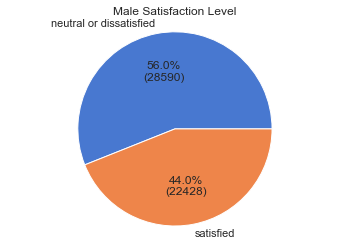

In [5]:
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
df_gender = df[['Gender', 'satisfaction']]
df_gender

df_male = df_gender.loc[df['Gender'] == 'Male']
df_female = df_gender.loc[df['Gender'] == 'Female']
df_male.value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
    
sns.set_theme(style="white", palette = 'muted')
male = df_male['satisfaction'].value_counts()
plt.pie(male,labels = male.index, autopct=autopct_format(male))
plt.title('Male Satisfaction Level')
plt.axis('equal')
plt.show()

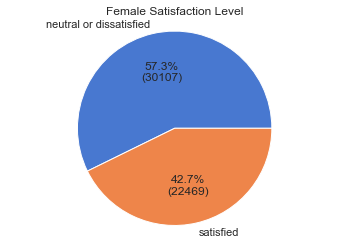

In [6]:
sns.set_theme(style="white", palette = 'muted')
female = df_female['satisfaction'].value_counts()
plt.pie(female,labels = female.index, autopct=autopct_format(female))
plt.title('Female Satisfaction Level')
plt.axis('equal')
plt.show()

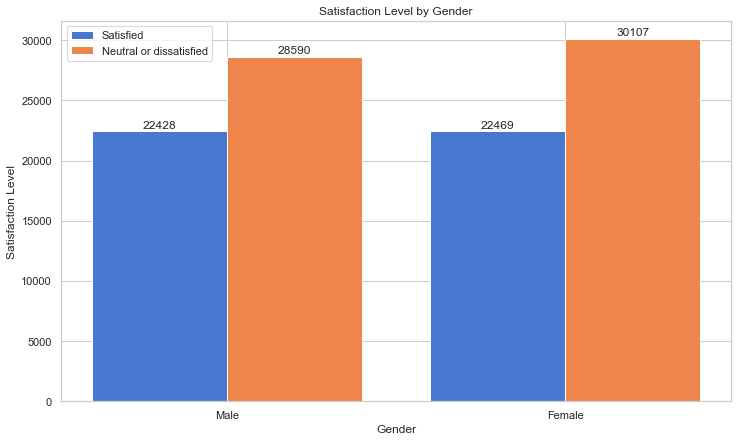

In [7]:
X = ['Male', 'Female'] 
satisfied = [22428,22469] 
unsatisfied = [28590, 30107] 
  
X_axis = np.arange(len(X)) 

sns.set_theme(style="whitegrid", palette = 'muted')
plt.figure(figsize=(12,7))
  
p1 = plt.bar(X_axis - 0.2, satisfied, 0.4, label = 'Satisfied') 
p2 = plt.bar(X_axis + 0.2, unsatisfied, 0.4, label = 'Neutral or dissatisfied')

for p in p1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')
    
for p in p2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')


# for rect1 in p1:
#     height = rect1.get_height()
#     plt.annotate( "{}%".format(height/),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=11)
    
# for rect1 in p2:
#     height = rect1.get_height()
#     plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=11)

plt.xticks(X_axis, X) 
plt.xlabel("Gender") 
plt.ylabel("Satisfaction Level") 
plt.title("Satisfaction Level by Gender") 
plt.legend(loc = 'upper left') 
plt.show() 

Optimum level of cleanliness

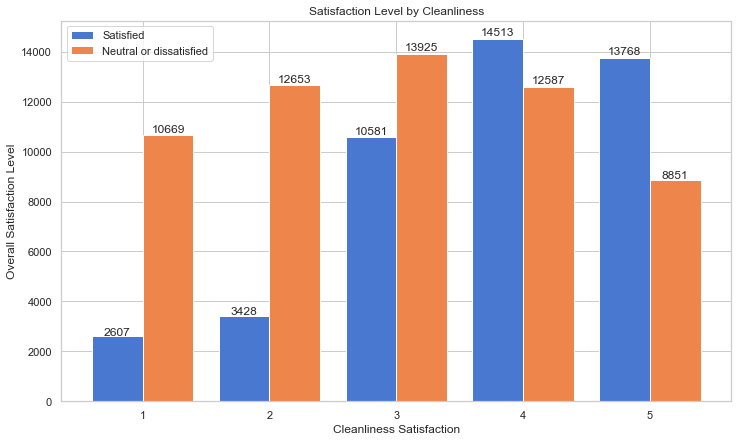

In [8]:
X = [1,2,3,4,5] 
satisfied = [2607, 3428, 10581, 14513, 13768] 
unsatisfied = [10669, 12653, 13925, 12587, 8851] 

X_axis = np.arange(len(X)) 

sns.set_theme(style="whitegrid", palette = 'muted')
plt.figure(figsize=(12,7))
  
p1 = plt.bar(X_axis - 0.2, satisfied, 0.4, label = 'Satisfied') 
p2 = plt.bar(X_axis + 0.2, unsatisfied, 0.4, label = 'Neutral or dissatisfied')

for p in p1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')
    
for p in p2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')
    
plt.xticks(X_axis, X) 
plt.xlabel("Cleanliness Satisfaction") 
plt.ylabel("Overall Satisfaction Level") 
plt.title("Satisfaction Level by Cleanliness") 
plt.legend(loc = 'upper left') 
plt.show() 

In [9]:
# df.corr()
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Gender      Customer Type  Age   Type of Travel     Class  \
0            0     Loyal Customer   13  Personal Travel  Eco Plus   
1            0  disloyal Customer   25  Business travel  Business   
2            1     Loyal Customer   26  Business travel  Business   
3            1     Loyal Customer   25  Business travel  Business   
4            0     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899       1  disloyal Customer   23  Business travel       Eco   
103900       0     Loyal Customer   49  Business travel  Business   
103901       0  disloyal Customer   30  Business travel  Business   
103902       1  disloyal Customer   22  Business travel       Eco   
103903       0     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  ...  Inflight entertainment  On-board service  \
0                   1  ...                       5                 4   
1                   3  ...                       1                 1   
2                   2  ...                       5                 4   
3                   5  ...                       2                 2   
4                   3  ...                       3                 3   
...               ...  ...                     ...               ...   
103899              3  ...                       2                 3   
103900              4  ...                       5                 5   
103901              3  ...                       4                 3   
103902              5  ...                       1                 4   
103903              3  ...                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5               

In [10]:
df["satisfaction"] = df["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied": 1})

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Arrival Delay in Minutes            -0.057582
Departure/Arrival time convenient   -0.051718
Departure Delay in Minutes          -0.050515
Gate location                        0.000449
Ease of Online booking               0.171507
Food and drink                       0.209659
Checkin service                      0.235914
Inflight service                     0.244852
Baggage handling                     0.247819
Inflight wifi service                0.284163
Flight Distance                      0.298915
Cleanliness                          0.305050
Leg room service                     0.313182
On-board service                     0.322450
Seat comfort                         0.349112
Inflight entertainment               0.398203
Online boarding                      0.503447
dtype: float64


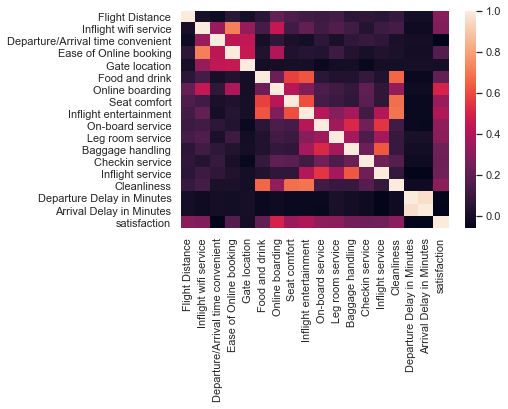

In [11]:
l = df.iloc[:, 5:-1].corrwith(df['satisfaction']).sort_values()
print(l)
heat = sns.heatmap(df.iloc[:, 5:].corr())

## What to do
 - By age group what is the most important factor / age ratings - Shaf
 - Factors that become least or more important depending on flight time/duration - Katherine
 - Loyal vs nonloyal customer ratings - Katherine
 - Gender ratings - Agathe
 - What is the optimum level of cleanliness/food & drink/inflight service: are people satisfied with 3 - All
 - Report - All
 - If extra time: find another dataset which has flight times and make a graph


## Limitations
- Price is not included
- Time of flight is not included, set as convenient or not


In [12]:
df["Customer Type"] = df["Customer Type"].replace({"Loyal Customer": 1, "disloyal Customer": 0})
df["Type of Travel"] = df["Type of Travel"].replace({"Personal Travel": 0, "Business travel": 1})
df["Class"] = df["Class"].replace({"Eco": 1, "Eco Plus": 2, "Business": 3})
df

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            0              1   13               0      2              460   
1            0              0   25               1      3              235   
2            1              1   26               1      3             1142   
3            1              1   25               1      3              562   
4            0              1   61               1      3              214   
...        ...            ...  ...             ...    ...              ...   
103899       1              0   23               1      1              192   
103900       0              1   49               1      3             2347   
103901       0              0   30               1      3             1995   
103902       1              0   22               1      1             1000   
103903       0              1   27               1      3             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
103899                       2              3  ...                       2   
103900                       4              4  ...                       5   
103901                       1              3  ...                       4   
103902                       1              5  ...                       1   
103903                       3              3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

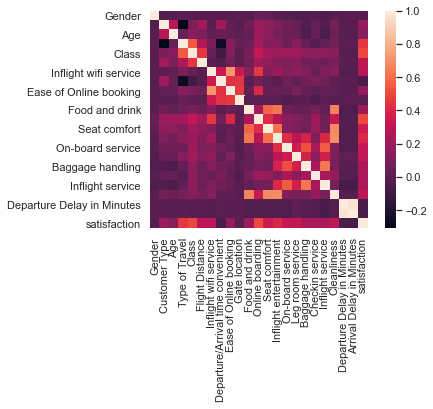

In [13]:
cor = df.corr()
sns.heatmap(cor, square = True)
plt.show()

In [14]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

df = df.sample(n = 33000)
X = df.sample(n = 33000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

model = cluster.AgglomerativeClustering(n_clusters=2, linkage="single", affinity="euclidean")

# Once created, now we can fit the model to the data
model.fit(df)

AgglomerativeClustering(linkage='single')

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
print("Silhouette Coefficient:", metrics.silhouette_score(df, model.labels_))

# We can also calculate the calinski_harabasz_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(df, model.labels_))

Silhouette Coefficient: 0.558497596609834
Calinski_harabasz Coefficient: 6.36841314379754


In [16]:
print("Completeness score", metrics.completeness_score(df['satisfaction'], model.labels_))
print("Homogeneity score", metrics.homogeneity_score(df['satisfaction'], model.labels_))

Completeness score 0.0741798510707501
Homogeneity score 3.752932158181552e-05


In [17]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [19]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  ...  Inflight entertainment  On-board service  \
0                   1  ...                       5                 4   
1                   3  ...                       1                 1   
2                   2  ...                       5                 4   
3                   5  ...                       2                 2   
4                   3  ...                       3                 3   
...               ...  ...                     ...               ...   
103899              3  ...                       2                 3   
103900              4  ...                       5                 5   
103901              3  ...                       4                 3   
103902              5  ...                       1                 4   
103903              3  ...                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5               

In [20]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

In [21]:
# Define a function to map ages to age groups
def assign_age_group(age):
    if age <= 17:
        return 'Children'
    elif age <= 35:
        return 'Young Adults'
    elif age <= 59:
        return 'Adults (Middle Age)'
    else:
        return 'Senior Citizens'

# Apply the function to create an 'AgeGroup' column
df['AgeGroup'] = df['Age'].apply(assign_age_group)

# Count the occurances of each age group
age_group_counts = df['AgeGroup'].value_counts()

print(age_group_counts)

Adults (Middle Age)    52587
Young Adults           33424
Senior Citizens         9682
Children                7901
Name: AgeGroup, dtype: int64


c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [22]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'AgeGroup'],
      dtype='object')

In [23]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


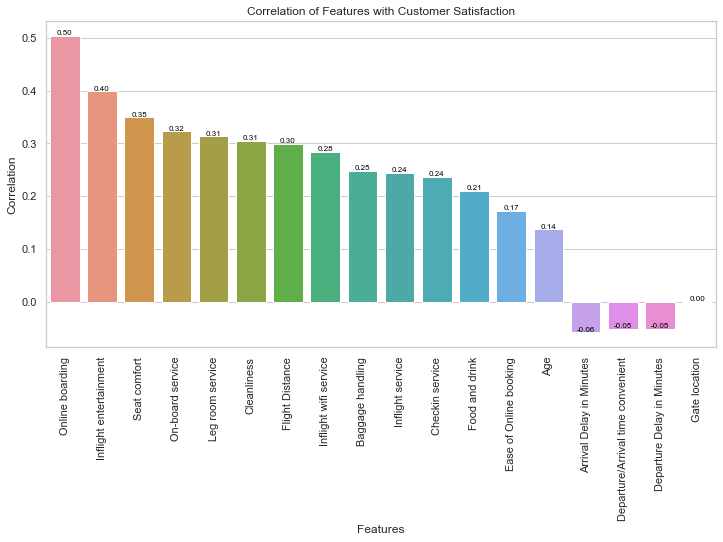

In [24]:
# Select only the numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number])

# Convert the 'satisfaction' column to numerical
df['Satisfaction_Numerical'] = np.where(df['satisfaction'] == 'satisfied', 1, 0)

# Define a dictionary to store correlation
correlation_dict = {}

# Loop through numeric columns and calculate correlation with satisfaction
for column in numeric_columns.columns:
    if column != 'Satisfaction_Numerical':
        correlation, _ = pointbiserialr(numeric_columns[column], df['Satisfaction_Numerical'])
        correlation_dict[column] = correlation

# Sort the dictionary in descending order
sorted_correlation = {x: y for x, y in sorted(correlation_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

# Graphs
plt.figure(figsize=(12, 6))
barPlot = sns.barplot(x=list(sorted_correlation.keys()), y=list(sorted_correlation.values()))
plt.xticks(rotation=90)
plt.title("Correlation of Features with Customer Satisfaction")
plt.xlabel('Features')
plt.ylabel('Correlation')

# correlation value above each bar
for bar, correlation in zip(barPlot.patches, sorted_correlation.values()):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{correlation:.2f}', ha='center', va='bottom', fontsize=8, color='black'
    )
plt.show()

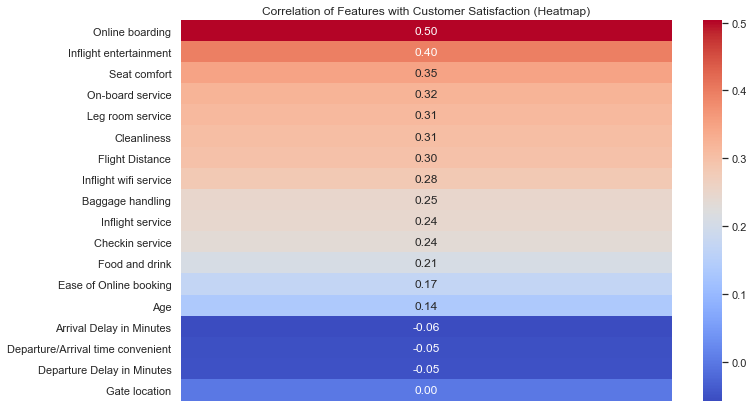

In [25]:
# Calculate correlations
correlation_matrix = numeric_columns.corrwith(df['Satisfaction_Numerical'])

# Sort the correlation  in descending order
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)
correlation_matrix = correlation_matrix[sorted_correlation.index]

# Exclude 'Satisfaction_Numerical' from the heatmap
correlation_matrix = correlation_matrix.drop('Satisfaction_Numerical', errors='ignore')

# Heatmap
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, xticklabels=False)
plt.title("Correlation of Features with Customer Satisfaction (Heatmap)")
plt.show()

In [26]:
# Group data by 'AgeGroup' and calculate correlation for each group
age_groups = df['AgeGroup'].unique()
correlation_results = {}

for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    correlation_matrix = subset.corr()
    sortedCorrelation = correlation_matrix['Satisfaction_Numerical'].abs().sort_values(ascending=False)
    correlation_results[age_group] = sortedCorrelation

# Compare for different age groups
for age_group, correlations in correlation_results.items():
    print(f"Age Group: {age_group}")
    print(correlations)
    print('\n')

Age Group: Children
Satisfaction_Numerical               1.000000
Online boarding                      0.384768
Inflight wifi service                0.338050
Ease of Online booking               0.252514
Food and drink                       0.134483
Flight Distance                      0.132487
Inflight entertainment               0.129838
Cleanliness                          0.128797
Seat comfort                         0.119014
Age                                  0.104681
Arrival Delay in Minutes             0.096402
Departure Delay in Minutes           0.089646
Checkin service                      0.084127
On-board service                     0.071267
Inflight service                     0.052515
Departure/Arrival time convenient    0.051410
Baggage handling                     0.047895
Gate location                        0.016273
Leg room service                     0.012256
Name: Satisfaction_Numerical, dtype: float64


Age Group: Young Adults
Satisfaction_Numerical             

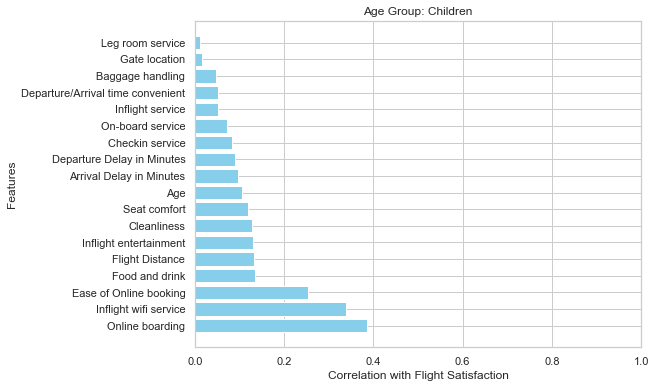

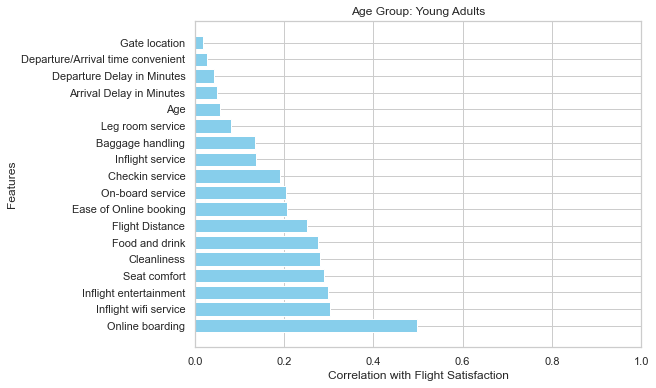

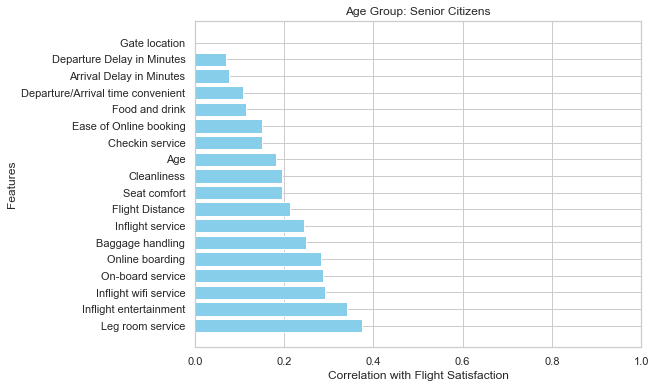

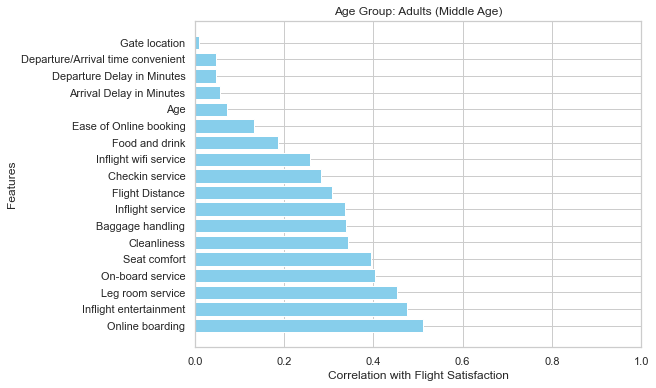

In [27]:
# Plot correlations for each age group
for age_group, correlations in correlation_results.items():
    # Exclude 'Satisfaction_Numerical' from the correlations
    correlations = correlations[correlations.index != 'Satisfaction_Numerical']

    # Create a bar plot for the current age group
    plt.figure(figsize=(8, 6))
    plt.barh(correlations.index, correlations.values, color='skyblue')
    plt.xlim(0, 1)
    plt.xlabel('Correlation with Flight Satisfaction')
    plt.ylabel('Features')
    plt.title(f'Age Group: {age_group}')

In [28]:
# Mean values for each age group
seniors = df[df['AgeGroup'] == 'Senior Citizens']
middle = df[df['AgeGroup'] == 'Adults (Middle Age)']
adults = df[df['AgeGroup'] == 'Young Adults']
children = df[df['AgeGroup'] == 'Children']
print(seniors.mean())
print(middle.mean())
print(adults.mean())
print(children.mean())

Age                                    65.002479
Flight Distance                      1042.152138
Inflight wifi service                   2.612477
Departure/Arrival time convenient       3.315431
Ease of Online booking                  2.670213
Gate location                           2.944846
Food and drink                          3.119603
Online boarding                         3.253976
Seat comfort                            3.424396
Inflight entertainment                  3.173208
On-board service                        3.210804
Leg room service                        3.077463
Baggage handling                        3.363045
Checkin service                         3.198306
Inflight service                        3.377711
Cleanliness                             3.166185
Departure Delay in Minutes             14.305722
Arrival Delay in Minutes               14.651828
Satisfaction_Numerical                  0.270502
dtype: float64
Age                                    46.710993
Fligh

In [29]:
# Filter satisfied passengers
satisfied = df[df['satisfaction'] == 'satisfied']

# Group the data by the 'AgeGroup' column
satisfiedAgeGroup = satisfied['AgeGroup'].value_counts().sort_index()

# Calculate the total count of passengers in each age group
total= df['AgeGroup'].value_counts().sort_index()

# Calculate the percentage of satisfied passengers in each group
percentage = (satisfiedAgeGroup / total) * 100

print(percentage.sort_values())

Children               16.390330
Senior Citizens        27.050196
Young Adults           36.177597
Adults (Middle Age)    54.939434
Name: AgeGroup, dtype: float64


In [30]:
df.info()
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [31]:
# Non-numerical columns to numerical
df.loc[:, 'Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 2])
df.loc[:, 'Customer Type'] = df['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [1, 2])
df.loc[:, 'Type of Travel'] = df['Type of Travel'].replace(['Personal Travel', 'Business travel'], [1, 2])
df.loc[:, 'Class'] = df['Class'].replace(['Eco Plus', 'Business', 'Eco'], [1, 2, 3])

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [32]:
df

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              1   13               1      1              460   
1            1              2   25               2      2              235   
2            2              1   26               2      2             1142   
3            2              1   25               2      2              562   
4            1              1   61               2      2              214   
...        ...            ...  ...             ...    ...              ...   
103899       2              2   23               2      3              192   
103900       1              1   49               2      2             2347   
103901       1              2   30               2      2             1995   
103902       2              2   22               2      3             1000   
103903       1              1   27               2      2             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Leg room service  \
0                            3              1  ...                 3   
1                            3              3  ...                 5   
2                            2              2  ...                 3   
3                            5              5  ...                 5   
4                            3              3  ...                 4   
...                        ...            ...  ...               ...   
103899                       2              3  ...                 1   
103900                       4              4  ...                 5   
103901                       1              3  ...                 2   
103902                       1              5  ...                 5   
103903                       3              3  ...                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5                 4            1   
103903                 4                4                 3            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                               25                      18.0   
1                                1                       6.0   
2                                0                       0.0   
3                               11                       9.0   
4                                0                       0.0   
...                            ...                       ...   
103899                      

In [33]:
df = df.drop(['AgeGroup'], axis=1)

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
selected_features = ['Inflight entertainment', 'Online boarding', 'Seat comfort', 'Cleanliness', 'On-board service']

# Prepare data
X = df[selected_features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters
n_clusters = 2

# Fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [35]:
from sklearn.metrics import completeness_score, homogeneity_score, calinski_harabasz_score

# Evaluate clusters
completeness = completeness_score(df['Satisfaction_Numerical'], df['Cluster'])
homogeneity = homogeneity_score(df['Satisfaction_Numerical'], df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f"Completeness Score: {completeness}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Completeness Score: 0.15746080436505197
Homogeneity Score: 0.15694253176158776
Calinski-Harabasz Score: 65011.468998128104


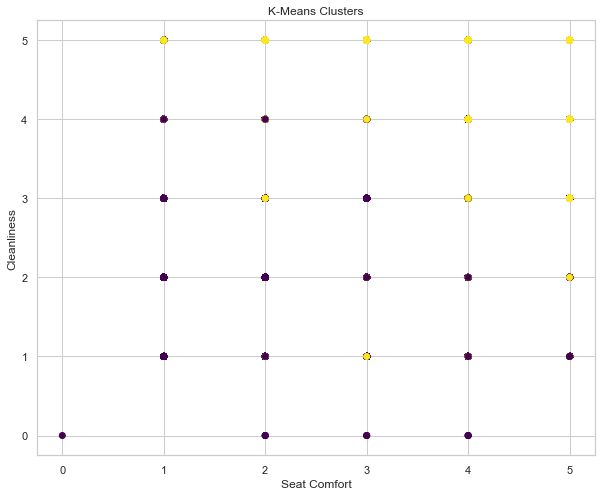

In [36]:
# # Visualize
plt.figure(figsize=(10, 8))
plt.scatter(df['Seat comfort'], df['Cleanliness'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Seat Comfort')
plt.ylabel('Cleanliness')
plt.title('K-Means Clusters')
plt.show()

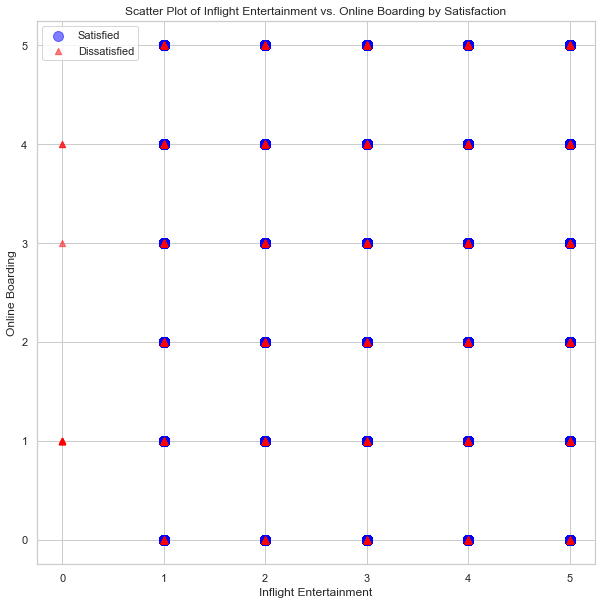

In [37]:
# Separate the data into satisfied and dissatisfied passengers
satisfied_passengers = df[df['Satisfaction_Numerical'] == 1]
dissatisfied_passengers = df[df['Satisfaction_Numerical'] == 0]

# Create a scatter plot
plt.figure(figsize=(10, 10))

# Plot satisfied passengers as blue circles
plt.scatter(satisfied_passengers['Inflight entertainment'], satisfied_passengers['Online boarding'], 
            label='Satisfied', color='blue', marker='o', alpha=0.5, s=100)

# Plot dissatisfied passengers as red triangles
plt.scatter(dissatisfied_passengers['Inflight entertainment'], dissatisfied_passengers['Online boarding'], 
            label='Dissatisfied', color='red', marker='^', alpha=0.5, s=40)

# Add labels and legend
plt.xlabel('Inflight Entertainment')
plt.ylabel('Online Boarding')
plt.legend()

# Set title and labels
plt.title('Scatter Plot of Inflight Entertainment vs. Online Boarding by Satisfaction')
plt.show()

In [38]:
legRoom_high = df[df['Leg room service'] >= 4]
legRoom_low = df[df['Leg room service'] < 4]

print('Seat Comfort Avg Rating (Good Leg Room): ', legRoom_high['Seat comfort'].mean())
print('Seat Comfort Avg Rating (Bad Leg Room): ', legRoom_low['Seat comfort'].mean())

Seat Comfort Avg Rating (Good Leg Room):  3.595951447385701
Seat Comfort Avg Rating (Bad Leg Room):  3.2742240162255674


In [39]:
avg_satisfied = satisfied_passengers.mean()
avg_dissatisfied = dissatisfied_passengers.mean()

print(avg_satisfied)
print('\n')
print(avg_dissatisfied)
print('\n')
diff_sat_dis = avg_satisfied - avg_dissatisfied
print(diff_sat_dis)

Gender                                  1.500457
Customer Type                           1.099873
Age                                    41.748558
Type of Travel                          1.927323
Class                                   2.152237
Flight Distance                      1530.180302
Inflight wifi service                   3.161191
Departure/Arrival time convenient       2.969887
Ease of Online booking                  3.031316
Gate location                           2.977682
Food and drink                          3.520814
Online boarding                         4.027285
Seat comfort                            3.966234
Inflight entertainment                  3.965276
On-board service                        3.857585
Leg room service                        3.822438
Baggage handling                        3.966345
Checkin service                         3.645656
Inflight service                        3.969887
Cleanliness                             3.744081
Departure Delay in M

In [40]:
print(satisfied_passengers['Class'].mode())
print(dissatisfied_passengers['Class'].mode())
print('\n')
print('Satisfied Group:')
print(satisfied_passengers['Class'].value_counts())
print('\nDissatisfied Group:')
print(dissatisfied_passengers['Class'].value_counts())

0    2
dtype: int64
0    3
dtype: int64


Satisfied Group:
2    34390
3     8671
1     1836
Name: Class, dtype: int64

Dissatisfied Group:
3    37922
2    15143
1     5632
Name: Class, dtype: int64


In [41]:
long_flight = df[df['Flight Distance'] >= 850]
short_flight = df[df['Flight Distance'] < 850]

print(long_flight['Inflight entertainment'].mean())
print(short_flight['Inflight entertainment'].mean())

print(long_flight['Inflight entertainment'].corr(long_flight['Satisfaction_Numerical']))
print(short_flight['Inflight entertainment'].corr(short_flight['Satisfaction_Numerical']))

print(long_flight['Class'].mode())
print(short_flight['Class'].mode())

3.475806137928352
3.2425827966881324
0.462909962969753
0.31799775152173326
0    2
dtype: int64
0    3
dtype: int64


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [44]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  ...  Inflight entertainment  On-board service  \
0                   1  ...                       5                 4   
1                   3  ...                       1                 1   
2                   2  ...                       5                 4   
3                   5  ...                       2                 2   
4                   3  ...                       3                 3   
...               ...  ...                     ...               ...   
103899              3  ...                       2                 3   
103900              4  ...                       5                 5   
103901              3  ...                       4                 3   
103902              5  ...                       1                 4   
103903              3  ...                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5               

In [45]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

In [46]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [47]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [48]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [49]:
df["satisfaction"] = df["satisfaction"].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df["Customer Type"] = df["Customer Type"].replace({'disloyal Customer': 0, 'Loyal Customer':1})
df["Type of Travel"] = df["Type of Travel"].replace({'Personal Travel': 0, 'Business travel':1})
df["Class"] = df["Class"].replace({'Eco': 1, 'Business':2,'Eco Plus':3})
df

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            0              1   13               0      3              460   
1            0              0   25               1      2              235   
2            1              1   26               1      2             1142   
3            1              1   25               1      2              562   
4            0              1   61               1      2              214   
...        ...            ...  ...             ...    ...              ...   
103899       1              0   23               1      1              192   
103900       0              1   49               1      2             2347   
103901       0              0   30               1      2             1995   
103902       1              0   22               1      1             1000   
103903       0              1   27               1      2             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
103899                       2              3  ...                       2   
103900                       4              4  ...                       5   
103901                       1              3  ...                       4   
103902                       1              5  ...                       1   
103903                       3              3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

In [50]:
# Segmenting dataset into target and data
target= df.values[:,22]
print(target)


[0. 0. 1. ... 0. 0. 0.]


In [51]:
data= df.values[:,0:21]
print(data)

[[ 0.  1. 13. ...  5.  5. 25.]
 [ 0.  0. 25. ...  4.  1.  1.]
 [ 1.  1. 26. ...  4.  5.  0.]
 ...
 [ 0.  0. 30. ...  5.  4.  7.]
 [ 1.  0. 22. ...  4.  1.  0.]
 [ 0.  1. 27. ...  3.  1.  0.]]


In [52]:
#  CLASSIFIER: LOGISTIC REGRESSION
#Split the data into training and testing
#Import the model
#DEFAULT PARAMETERS
import sklearn
assert sklearn.__version__ >= ".20"
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression()
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
#  CLASSIFIER: LOGISTIC REGRESSION - CONFUSION MATRIX
from sklearn import metrics
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[14050  3402]
 [ 3608 10019]]


In [54]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#ax=sns.heatmap((confusion_matrix1/np.sum(confusion_matrix1)),annot=True,fmt='.2%',cmap='Blues')
#plt.title('Logistic Regression - Confusion Matrix')
#plt.xlabel('Predicted Values',fontsize=10)
#plt.ylabel('True Values',fontsize=10)
#plt.show()

In [55]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#DEFAULT PARAMETERS
print(metrics.classification_report(y_test,prediction1))
#accuracy=0.75
#f1-score=0.78

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80     17452
         1.0       0.75      0.74      0.74     13627

    accuracy                           0.77     31079
   macro avg       0.77      0.77      0.77     31079
weighted avg       0.77      0.77      0.77     31079



In [56]:
#  CLASSIFIER: LOGISTIC REGRESSION  - CONFUSION MATRIX
#Split the data into training and testing
#Import the model
#CHANGING PARAMETERS 1
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200)
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[13174  4418]
 [ 2319 11168]]


c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y_test,prediction1))
#lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200)
#accuracy=0.79
#f1 score=0.81

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80     17592
         1.0       0.72      0.83      0.77     13487

    accuracy                           0.78     31079
   macro avg       0.78      0.79      0.78     31079
weighted avg       0.79      0.78      0.78     31079



In [58]:
#Split the data into training and testing
#Import the model
#CHANGING PARAMETERS 2
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200,multi_class='ovr',tol=0.0005)
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[13604  4002]
 [ 2252 11221]]


c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y_test,prediction1))
#lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200,multi_class='ovr',tol=0.0005)
#accuracy=0.78
#f1-score=0.78

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81     17606
         1.0       0.74      0.83      0.78     13473

    accuracy                           0.80     31079
   macro avg       0.80      0.80      0.80     31079
weighted avg       0.81      0.80      0.80     31079



In [60]:
#  CLASSIFIER: LOGISTIC REGRESSION  - CONFUSION MATRIX
#Split the data into training and testing
#Import the model
#CHANGING PARAMETERS 3
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression(penalty='l2',dual=False,C=0.2,class_weight='balanced',max_iter=1000)
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[15272  2404]
 [ 1964 11439]]


c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


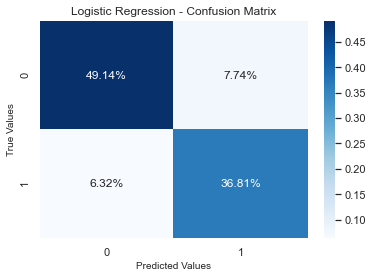

In [61]:
ax=sns.heatmap((confusion_matrix1/np.sum(confusion_matrix1)),annot=True,fmt='.2%',cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [62]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#CHANGING PARAMETERS 3
print(metrics.classification_report(y_test,prediction1))
#lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200,multi_class='ovr',tol=0.0005)
#accuracy=0.86
#f1-score=0.88


              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     17676
         1.0       0.83      0.85      0.84     13403

    accuracy                           0.86     31079
   macro avg       0.86      0.86      0.86     31079
weighted avg       0.86      0.86      0.86     31079



In [63]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX

from sklearn.neighbors import KNeighborsClassifier
x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier()#add parameters to increase accuracy
knn_model.fit(x2_train,y2_train)#add parameters to increase accuracy
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)



KNeighborsClassifier()
[[14248  3338]
 [ 4331  9162]]


In [64]:
#bx=sns.heatmap((confusion_matrix2/np.sum(confusion_matrix2)),annot=True,fmt='.2%',cmap='Oranges')
#plt.title('K Nearest Neighbours - Confusion Matrix')
#plt.xlabel('Predicted Values',fontsize=10)
#plt.ylabel('True Values',fontsize=10)
#plt.show()

In [65]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
print(metrics.classification_report(y2_test,prediction2))
#accuracy=0.75
#f1-score= 0.79

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     17586
         1.0       0.73      0.68      0.70     13493

    accuracy                           0.75     31079
   macro avg       0.75      0.74      0.75     31079
weighted avg       0.75      0.75      0.75     31079



In [66]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX
#CHANGING PARAMETERS 1

x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='kd_tree',leaf_size=60,p=1,n_jobs=2)
knn_model.fit(x2_train,y2_train)
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=60, n_jobs=2,
                     n_neighbors=10, p=1, weights='distance')
[[15237  2313]
 [ 2940 10589]]


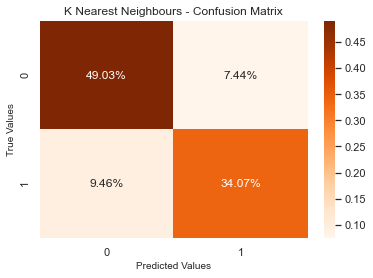

In [67]:
bx=sns.heatmap((confusion_matrix2/np.sum(confusion_matrix2)),annot=True,fmt='.2%',cmap='Oranges')
plt.title('K Nearest Neighbours - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [68]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y2_test,prediction2))
#accuracy = 0.83

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     17550
         1.0       0.82      0.78      0.80     13529

    accuracy                           0.83     31079
   macro avg       0.83      0.83      0.83     31079
weighted avg       0.83      0.83      0.83     31079



In [69]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX
#CHANGING PARAMETERS 2

x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier(n_neighbors=20,weights='distance',algorithm='kd_tree',leaf_size=70,p=1,n_jobs=5)
knn_model.fit(x2_train,y2_train)
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=70, n_jobs=5,
                     n_neighbors=20, p=1, weights='distance')
[[15319  2295]
 [ 3033 10432]]


In [70]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y2_test,prediction2))
#accuracy = 0.83 #incrementing n_neighbros, leaf_size and n_jobs does not increment accuracy
#f1-score= 0.85

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     17614
         1.0       0.82      0.77      0.80     13465

    accuracy                           0.83     31079
   macro avg       0.83      0.82      0.82     31079
weighted avg       0.83      0.83      0.83     31079



In [71]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX
#CHANGING PARAMETERS 3

x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='ball_tree',leaf_size=60,p=1,n_jobs=2)
knn_model.fit(x2_train,y2_train)
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=60, n_jobs=2,
                     n_neighbors=10, p=1, weights='distance')
[[15258  2334]
 [ 2990 10497]]


In [72]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
#CHANGING PARAMETERS 3
print(metrics.classification_report(y2_test,prediction2))
#accuracy = 0.83 # changing the algorithm used to compute the nearest neighbors to 'ball_tree' does not improve accuracy 
#f1-score=0.85

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     17592
         1.0       0.82      0.78      0.80     13487

    accuracy                           0.83     31079
   macro avg       0.83      0.82      0.82     31079
weighted avg       0.83      0.83      0.83     31079



In [73]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
from sklearn.tree import DecisionTreeClassifier
x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier()
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

DecisionTreeClassifier()
[[16738   935]
 [  769 12637]]


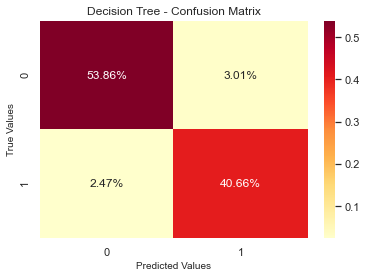

In [74]:
cx=sns.heatmap((confusion_matrix3/np.sum(confusion_matrix3)),annot=True,fmt='.2%',cmap='YlOrRd')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [75]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.94
#f1-score= 0.95

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     17673
         1.0       0.93      0.94      0.94     13406

    accuracy                           0.95     31079
   macro avg       0.94      0.94      0.94     31079
weighted avg       0.95      0.95      0.95     31079



In [76]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
#CHANGING PARAMETERS 1

x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier(criterion='entropy',splitter='random',max_features='log2',max_depth=20,min_samples_split=5,min_samples_leaf=2,max_leaf_nodes=20)
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=5, splitter='random')
[[14165  3472]
 [ 1873 11569]]


In [77]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.82 #Changing the default parameters decreased accuracy
#f1-score= 0.84

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84     17637
         1.0       0.77      0.86      0.81     13442

    accuracy                           0.83     31079
   macro avg       0.83      0.83      0.83     31079
weighted avg       0.83      0.83      0.83     31079



In [78]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
#CHANGING PARAMETERS 2

x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier(criterion='gini',splitter='random',max_features='sqrt',max_depth=20,min_samples_split=5,min_samples_leaf=2,max_leaf_nodes=20)
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=5,
                       splitter='random')
[[16585  1063]
 [ 4219  9212]]


In [79]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.85 #Changing criterion to 'gini' and max_features='sqrt' improved accuracy
#f1-score= 0.87

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86     17648
         1.0       0.90      0.69      0.78     13431

    accuracy                           0.83     31079
   macro avg       0.85      0.81      0.82     31079
weighted avg       0.84      0.83      0.83     31079



In [80]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
#CHANGING PARAMETERS 3

x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier(criterion='gini',splitter='random',max_features='sqrt',max_depth=50,min_samples_split=20,min_samples_leaf=10,max_leaf_nodes=40)
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', max_leaf_nodes=40,
                       min_samples_leaf=10, min_samples_split=20,
                       splitter='random')
[[16053  1551]
 [ 2928 10547]]


In [81]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
#CHANGING PARAMETERS 3
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.83 #Setting higher values for the int parameters decreased accuracy. 
#f1-score=0.83
#conclusion: default parameters are the best fit for the model


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     17604
         1.0       0.87      0.78      0.82     13475

    accuracy                           0.86     31079
   macro avg       0.86      0.85      0.85     31079
weighted avg       0.86      0.86      0.85     31079



In [82]:
#  CLASSIFIER: NAIVE BAYES - CONFUSION MATRIX

from sklearn.naive_bayes import GaussianNB
x4_train,x4_test,y4_train,y4_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
nb_model=GaussianNB()
nb_model.fit(x4_train,y4_train)
prediction4=nb_model.predict(x4_test)
confusion_matrix4=metrics.confusion_matrix(y4_test,prediction4)
print(confusion_matrix4)

[[15984  1644]
 [ 2448 11003]]


In [83]:
#dx=sns.heatmap((confusion_matrix4/np.sum(confusion_matrix4)),annot=True,fmt='.2%',cmap='RdPu')
#plt.title('Naive Bayes - Confusion Matrix')
#plt.xlabel('Predicted Values',fontsize=10)
#plt.ylabel('True Values',fontsize=10)
#plt.show()

In [84]:
# CLASSIFIER: NAIVE BAYES - CLASSIFICATION REPORT
print(metrics.classification_report(y4_test,prediction4))
#accuracy=0.87
#f1-score=0.89

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     17628
         1.0       0.87      0.82      0.84     13451

    accuracy                           0.87     31079
   macro avg       0.87      0.86      0.86     31079
weighted avg       0.87      0.87      0.87     31079



In [85]:
#  CLASSIFIER: NAIVE BAYES - CONFUSION MATRIX
#CHANGING PARAMETERS 1

x4_train,x4_test,y4_train,y4_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
nb_model=GaussianNB(var_smoothing=1e-20)
nb_model.fit(x4_train,y4_train)
prediction4=nb_model.predict(x4_test)
confusion_matrix4=metrics.confusion_matrix(y4_test,prediction4)
print(confusion_matrix4)

[[15911  1609]
 [ 2461 11098]]


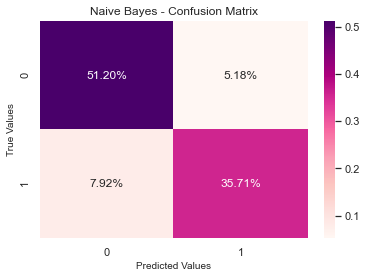

In [86]:
dx=sns.heatmap((confusion_matrix4/np.sum(confusion_matrix4)),annot=True,fmt='.2%',cmap='RdPu')
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [87]:
# CLASSIFIER: NAIVE BAYES - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y4_test,prediction4))
#accuracy=0.87 # Changing the var_smoothing to a smaller value does not improve accuracy
#f1-score=0.89

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     17520
         1.0       0.87      0.82      0.85     13559

    accuracy                           0.87     31079
   macro avg       0.87      0.86      0.87     31079
weighted avg       0.87      0.87      0.87     31079



In [88]:
#  CLASSIFIER: NAIVE BAYES - CONFUSION MATRIX
#CHANGING PARAMETERS 2

x4_train,x4_test,y4_train,y4_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
nb_model=GaussianNB(var_smoothing=1e-4)
nb_model.fit(x4_train,y4_train)
prediction4=nb_model.predict(x4_test)
confusion_matrix4=metrics.confusion_matrix(y4_test,prediction4)
print(confusion_matrix4)

[[15175  2423]
 [ 7667  5814]]


In [89]:
# CLASSIFIER: NAIVE BAYES - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y4_test,prediction4))
#accuracy=0.68 Changing the var_smoothing to a greater value does not improve accuracy
#f1-score=0.76

              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     17598
         1.0       0.71      0.43      0.54     13481

    accuracy                           0.68     31079
   macro avg       0.69      0.65      0.64     31079
weighted avg       0.68      0.68      0.66     31079



Conclusion:

The best classifier that fits the model is "Decision Tree" with its default parameters displaying an accuracy of 94%
-A classification report is a collection of different evaluation metrics.
- Read Classification report Anatomy for deeper analysis
-Use this link to help write analysis
https://www.youtube.com/watch?v=XiUlqN1Ay0U

Questions:

-I want to make a table out of the results. Is there a function I can use to extract results from classification report? or do I have to calculate the evaluation methods separately to build the table?